# Storm Track Data Cleaning

**Author:** *Ishan Singh Bhullar*<br>
**Created:** *11 December 2022*<br>
**Contact:** *ishanbhullar@gmail.com*<br>
**Last Edit:** *09 September 2024*<br>

## Table of Contents

1. [Introduction](#Introduction)<br><br>
2. [Importing Relevant Libraries](#Importing-Relevant-Libraries)<br><br>
3. [Function Declarations](#Function-Declarations)<br><br>
4. [Data Cleaning](#Data-Cleaning)<br><br>
5. [Writing Final Dataset to *.csv* file](#Writing-Final-Dataset-to-*.csv*-file)<br><br>

## Introduction

The purpose of this notebook is to clean the International Best Track Archive for Climate Stewardship (IBTrACS) data obtained from the National Center for Environmental Information (NCEI). The related data and documentation can be found [HERE](https://www.ncei.noaa.gov/products/international-best-track-archive).

The data I will be working on is the storm track data for the North Atlantic Basin. 

At the end of the cleaning, the resultant data set will be exported as a *.csv* file. 

## Importing Relevant Libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime # for timer function

In [170]:
import warnings
warnings.filterwarnings("ignore")

In [171]:
import plotly.express as px
import plotly.graph_objects as go

## Function Declarations

##### Runtime Function

A quick, custom runtime function to output time taken to run a line or block of code.

In [172]:
def timer(started=None):
    '''
    A simple function to print runtime of a line or block of code and return the resulting
    datetime.timedelta variable.
    
    It accepts one datetime parameter which is used in an If loop to decide
    whether the timer is starting or stopping.
    
    Parameters
    ---------------
    started: datetime type
        Default value = False
        
    Returns
    ---------------
    If started parameter is None, returns current time.
    If started parameter is not None:
        1. prints runtime of code 
        2. datetime.timedelta variable.
    '''  
    if started==None:
        return datetime.now()
    else:
        end = datetime.now()
        runtime = end - started
        print(f'The runtime of your code is: {runtime} (h:mm:ss)')
        return runtime
        

## Loading .csv Data for Storm Tracks

In [173]:
storm = pd.read_csv("data/ibtracs.NA.list.v04r00.csv", low_memory=False)

Set Global options to show all columns.

In [174]:
pd.options.display.max_columns = 50  # removes limits on number of columns shown
pd.options.display.max_rows = 170 # removes limits on number of rows shown

In [175]:
storm.head(20)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,...,TD9635_WIND,TD9635_PRES,TD9635_ROCI,NEUMANN_LAT,NEUMANN_LON,NEUMANN_CLASS,NEUMANN_WIND,NEUMANN_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,kts,mb,,,km,km,,,,degrees_north,degrees_east,,,kts,mb,...,kts,mb,nmile,degrees_north,degrees_east,,kts,mb,degrees_north,degrees_east,,kts,mb,kts,kts,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,,,,main,335,323,_____________O,,,,,,,,,...,,,,,,,,,26.1000,-90.4000,TD,30,,,,,,,,,,,,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,,,,main,323,312,_____________P,,,,,,,,,...,,,,,,,,,26.2001,-90.6999,TD,30,,,,,,,,,,,,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,,,,main,312,302,_____________O,,,,,,,,,...,,,,,,,,,26.3000,-91.0000,TD,30,,,,,,,,,,,,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,,,,main,304,296,_____________P,,,,,,,,,...,,,,,,,,,26.3999,-91.3001,TD,32,,,,,,,,,,,,6,290
5,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 00:00:00,TS,26.5000,-91.6000,,,,main,298,292,_____________O,,,,,,,,,...,,,,,,,,,26.5000,-91.6000,TS,35,,,,,,,,,,,,6,290
6,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 03:00:00,TS,26.5999,-91.9001,,,,main,295,292,_____________P,,,,,,,,,...,,,,,,,,,26.5999,-91.9001,TS,35,,,,,,,,,,,,6,290
7,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 06:00:00,TS,26.7000,-92.2000,,,,main,296,295,_____________O,,,,,,,,,...,,,,,,,,,26.7000,-92.2000,TS,35,,,,,,,,,,,,6,290
8,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 09:00:00,TS,26.7999,-92.5001,,,,main,300,292,_____________P,,,,,,,,,...,,,,,,,,,26.7999,-92.5001,TS,40,,,,,,,,,,,,6,290
9,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 12:00:00,TS,26.9000,-92.8000,,,,main,294,287,_____________O,,,,,,,,,...,,,,,,,,,26.9000,-92.8000,TS,45,,,,,,,,,,,,6,290


Check to see how many unique storms are in database.

In [176]:
print(f"There are {storm['SID'].value_counts().shape[0]} unique storms in the database.")

There are 2321 unique storms in the database.


In [177]:
print(f'We have {storm.shape[0]} rows and {storm.shape[1]} columns.')

We have 125452 rows and 163 columns.


Let's see if all the columns are useful.

## Data Cleaning

In [178]:
pd.DataFrame(storm.columns)

,0
0,SID
1,SEASON
2,NUMBER
3,BASIN
4,SUBBASIN
5,NAME
6,ISO_TIME
7,NATURE
8,LAT
9,LON


The column descriptions can be found at *[https://www.ncei.noaa.gov/sites/default/files/2021-07/IBTrACS_v04_column_documentation.pdf](https://www.ncei.noaa.gov/sites/default/files/2021-07/IBTrACS_v04_column_documentation.pdf)*.

Let's change the column names to lowercase for ease of use.

In [179]:
storm.columns = storm.columns.str.lower()
storm.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,track_type,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_record,usa_status,usa_wind,usa_pres,...,td9635_wind,td9635_pres,td9635_roci,neumann_lat,neumann_lon,neumann_class,neumann_wind,neumann_pres,mlc_lat,mlc_lon,mlc_class,mlc_wind,mlc_pres,usa_gust,bom_gust,bom_gust_per,reunion_gust,reunion_gust_per,usa_seahgt,usa_searad_ne,usa_searad_se,usa_searad_sw,usa_searad_nw,storm_speed,storm_dir
0,,Year,,,,,,,degrees_north,degrees_east,kts,mb,,,km,km,,,,degrees_north,degrees_east,,,kts,mb,...,kts,mb,nmile,degrees_north,degrees_east,,kts,mb,degrees_north,degrees_east,,kts,mb,kts,kts,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,,,,main,335,323,_____________O,,,,,,,,,...,,,,,,,,,26.1000,-90.4000,TD,30,,,,,,,,,,,,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,,,,main,323,312,_____________P,,,,,,,,,...,,,,,,,,,26.2001,-90.6999,TD,30,,,,,,,,,,,,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,,,,main,312,302,_____________O,,,,,,,,,...,,,,,,,,,26.3000,-91.0000,TD,30,,,,,,,,,,,,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,,,,main,304,296,_____________P,,,,,,,,,...,,,,,,,,,26.3999,-91.3001,TD,32,,,,,,,,,,,,6,290


#### Empty Columns

There are a lot of empty columns in the dataset. We can drop all those to make data wrangling a lot easier. I will begin with dropping all columns that have more than 90% empty rows. The more nuanced columns will have to be dealt with individually. I will do this using a `for` loop to iterate through the columns on the `storm` dataframe.

In [180]:
time = timer() #start timer
for column in storm.columns:
    temp_df = pd.DataFrame(storm[column].value_counts(normalize=True)) # creating a temporary dataframe to store column 
    if temp_df.iloc[0,0] > 0.90:                                       # values and number as a fraction of total rows
        storm.drop(columns=column, inplace=True)
    else:
        continue
runtime = timer(time) # stop timer

The runtime of your code is: 0:00:14.378672 (h:mm:ss)


In [181]:
pd.DataFrame(storm.columns)

,0
0,sid
1,season
2,number
3,basin
4,subbasin
5,name
6,iso_time
7,nature
8,lat
9,lon


In [182]:
storm.shape

(125452, 35)

Our main data set has been reduced to 35 columns.

#### `number` Column

In [183]:
storm['number'].value_counts()

60     2326
54     2253
43     2069
20     1979
41     1974
23     1948
57     1924
52     1900
25     1819
29     1811
36     1811
71     1809
69     1798
65     1770
59     1738
48     1708
78     1692
32     1679
24     1656
45     1627
15     1603
58     1590
33     1573
13     1542
68     1536
17     1530
19     1528
38     1503
44     1489
62     1469
47     1435
50     1431
51     1420
27     1419
26     1410
34     1369
18     1368
31     1361
22     1360
39     1348
49     1324
76     1319
64     1317
14     1306
30     1306
21     1266
40     1261
37     1236
56     1207
35     1198
72     1196
16     1196
55     1179
67     1176
46     1149
92     1132
28     1122
11     1110
70     1105
85     1100
87     1100
77     1098
88     1086
66     1075
12     1037
42     1035
74     1031
75     1018
89     1004
79      996
10      971
63      966
93      962
73      857
84      842
98      768
83      767
94      746
61      744
90      713
99      694
97      667
80      656
53  

`number` column seems to have quite a lot of unique values. Let's look a little deeper into it to see if its useful or just for administrative/indexing purposes. 

In [184]:
storm[storm['season'] == '1976'].groupby('number').agg('count')

,sid,season,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102,89,89,0,0,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
105,17,17,0,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
106,17,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
113,29,29,0,0,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
115,57,57,0,0,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
117,19,19,0,17,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
119,17,17,0,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
120,69,69,0,0,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
123,73,73,0,39,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73


In [185]:
storm[storm['number'] == '119']

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
84598,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-26 12:00:00,TS,12.0000,-35.0000,20,,hurdat_atl,1751,1732,O_____________,hurdat_atl,AL181976,12.0000,-35.0000,TD,20,,-1,,,,,,,,,,13,270
84599,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-26 15:00:00,TS,12.0004,-35.6625,,,,1729,1713,P_____________,,AL181976,12.0004,-35.6625,TD,22,,-1,,,,,,,,,,13,270
84600,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-26 18:00:00,TS,12.0000,-36.3000,25,,hurdat_atl,1713,1699,O_____________,hurdat_atl,AL181976,12.0000,-36.3000,TD,25,,-1,,,,,,,,,,12,270
84601,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-26 21:00:00,TS,11.9998,-36.9000,,,,1699,1688,P_____________,,AL181976,11.9998,-36.9000,TD,25,,-1,,,,,,,,,,12,270
84602,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-27 00:00:00,TS,12.0000,-37.5000,25,,hurdat_atl,1688,1680,O_____________,hurdat_atl,AL181976,12.0000,-37.5000,TD,25,,-1,,,,,,,,,,12,270
84603,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-27 03:00:00,TS,12.0000,-38.1500,,,,1680,1624,P_____________,,AL181976,12.0000,-38.1500,TD,27,,-1,,,,,,,,,,13,270
84604,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-27 06:00:00,TS,12.0000,-38.8000,30,,hurdat_atl,1624,1559,O_____________,hurdat_atl,AL181976,12.0000,-38.8000,TD,30,,-1,,,,,,,,,,14,269
84605,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-27 09:00:00,TS,11.9852,-39.5724,,,,1550,1513,P_____________,,AL181976,11.9852,-39.5724,TD,30,,-1,,,,,,,,,,12,270
84606,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-27 12:00:00,TS,12.0000,-40.0000,30,,hurdat_atl,1513,1513,O_____________,hurdat_atl,AL181976,12.0000,-40.0000,TD,30,,-1,,,,,,,,,,1,318
84607,1976271N12325,1976,119,NaN,NaN,NOT_NAMED,1976-09-27 15:00:00,TS,12.0776,-39.6650,,,,1547,1547,P_____________,,AL181976,12.0776,-39.6650,TD,30,,-1,,,,,,,,,,10,78


`number` column values mark the cardinal number for the storm across all basins for the season. It might be interesting to see if there is any correlation between the number of storms in a given season and their intensities. So, I will keep the column for now.

#### `basin` column

In [186]:
storm['basin'].value_counts()

EP    504
NI     66
        1
Name: basin, dtype: int64

In [279]:
storm['basin'].isna().sum()

112216

In [187]:
storm[storm['basin']=='EP']

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
16587,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 12:00:00,TS,11.6000,-86.6667,50,,hurdat_atl,31,31,O____________O,hurdat_atl,AL041876,11.5000,-86.5000,TS,50,,0,,,,,,11.8000,-87.0000,TS,60,10,258
16588,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 15:00:00,TS,11.4783,-87.1501,,,,83,83,P____________P,,AL041876,11.3924,-87.0001,TS,50,,0,,,,,,11.6499,-87.4500,TS,55,10,256
16589,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 18:00:00,TS,11.3667,-87.6333,50,,hurdat_atl,124,124,O____________O,hurdat_atl,AL041876,11.3000,-87.5000,TS,50,,0,,,,,,11.5000,-87.9000,TS,50,10,260
16590,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 21:00:00,TS,11.3158,-88.1166,,,,164,164,P____________P,,AL041876,11.2849,-87.9999,TS,50,,0,,,,,,11.3774,-88.3500,TS,50,10,266
16591,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-05 00:00:00,TS,11.3000,-88.6200,50,,hurdat_atl,203,203,O____________O,hurdat_atl,AL041876,11.3000,-88.5000,TS,50,,0,,,,,,11.3000,-88.8000,TS,50,10,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125389,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 06:00:00,TS,13.2000,-88.8500,,,,10,10,O_____________,nhc_working_bt,EP182022,13.1000,-88.8000,TS,35,1000,0,20,30,1005,100,25,,,,,11,296
125390,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 09:00:00,TS,13.3771,-89.2719,,,,11,0,P_____________,,EP182022,13.3196,-89.2430,TS,35,1001,0,20,30,1005,95,22,,,,,9,296
125391,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 12:00:00,TS,13.6000,-89.7000,,,,0,0,O_____________,nhc_working_bt,EP182022,13.6000,-89.7000,TS,35,1002,0,20,30,1005,90,20,,,,,12,302
125392,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.9957,-90.2940,,,,0,0,P_____________,,EP182022,14.0106,-90.3016,TS,30,1004,-1,,,1006,90,40,,,,,16,306


Initially, I thought to drop `EP` (Eastern Pacific) and the `NI` (North Indian) rows from the dataset as I only wanted to work with the North Atlantic Basin. However, it would be better to keep these values and make a separate dataset with North Atlantic values to work with right now. The other basin values might be useful at a later stage for modelling/testing. 

#### `subbasin` Column

In [188]:
storm['subbasin'].value_counts()

CS    15601
GM    13681
MM      504
AS       66
          1
Name: subbasin, dtype: int64

From the column notes table:

Subbasins include:
- MM - missing - no sub basin for this basin (no subbasins provided for WP, SI)
- CS - Caribbean Sea
- GM - Gulf of Mexico
- CP - Central Pacific
- BB - Bay of Bengal
- AS - Arabian Sea
- WA - Western Australia
- EA - Eastern Australia

This column will be converted to dummy variables later in the process. For now, let's take a look at the *MM* or missing values for this column.

In [189]:
storm[storm['subbasin'] == 'MM'].head(50)

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
16587,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 12:00:00,TS,11.6000,-86.6667,50,,hurdat_atl,31,31,O____________O,hurdat_atl,AL041876,11.5000,-86.5000,TS,50,,0,,,,,,11.8000,-87.0000,TS,60,10,258
16588,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 15:00:00,TS,11.4783,-87.1501,,,,83,83,P____________P,,AL041876,11.3924,-87.0001,TS,50,,0,,,,,,11.6499,-87.4500,TS,55,10,256
16589,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 18:00:00,TS,11.3667,-87.6333,50,,hurdat_atl,124,124,O____________O,hurdat_atl,AL041876,11.3000,-87.5000,TS,50,,0,,,,,,11.5000,-87.9000,TS,50,10,260
16590,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-04 21:00:00,TS,11.3158,-88.1166,,,,164,164,P____________P,,AL041876,11.2849,-87.9999,TS,50,,0,,,,,,11.3774,-88.3500,TS,50,10,266
16591,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-05 00:00:00,TS,11.3000,-88.6200,50,,hurdat_atl,203,203,O____________O,hurdat_atl,AL041876,11.3000,-88.5000,TS,50,,0,,,,,,11.3000,-88.8000,TS,50,10,269
16592,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-05 03:00:00,TS,11.2951,-89.1250,,,,215,215,P____________P,,AL041876,11.3052,-89.0000,TS,50,,0,,,,,,11.2849,-89.2499,TS,50,10,270
16593,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-05 06:00:00,TS,11.3000,-89.6200,50,,hurdat_atl,229,229,O____________O,hurdat_atl,AL041876,11.3000,-89.5000,TS,50,,0,,,,,,11.3000,-89.7000,TS,50,10,271
16594,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-05 09:00:00,TS,11.3051,-90.1500,,,,250,250,_____________P,,AL041876,,,TS,,,-5,,,,,,11.3051,-90.1500,TS,50,10,270
16595,1876273N14301,1876,22,EP,MM,NOT_NAMED,1876-10-05 12:00:00,TS,11.3000,-90.6000,,,,261,,_____________O,,,,,,,,-5,,,,,,11.3000,-90.6000,TS,50,9,269
39438,1902276N14266,1902,41,EP,MM,NOT_NAMED,1902-10-03 00:00:00,TS,14.0000,-93.8000,30,,hurdat_atl,163,155,O_____________,hurdat_atl,AL041902,14.0000,-93.8000,TD,30,,-1,,,,,,,,,,5,339


In [190]:
storm[storm['subbasin'] == 'MM'].tail(50)

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
124665,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-04 15:00:00,TS,13.6195,-98.8879,,,,293,293,P_____________,,EP042022,13.6195,-98.8879,HU,80,981,1,80,70,1009,90,15,,,,,13,275
124666,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-04 18:00:00,TS,13.7000,-99.5000,,,,306,302,O_____________,nhc_working_bt,EP042022,13.7000,-99.5000,HU,85,978,2,80,70,1009,90,15,,,,,13,286
124667,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-04 21:00:00,TS,13.9696,-100.127,,,,303,289,P_____________,,EP042022,13.9696,-100.127,HU,87,976,2,80,70,1009,90,15,,,,,14,295
124668,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-05 00:00:00,TS,14.3000,-100.800,,,,293,292,O_____________,nhc_working_bt,EP042022,14.3000,-100.800,HU,90,974,2,80,70,1009,90,15,,,,,16,293
124669,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-05 03:00:00,TS,14.5727,-101.600,,,,303,303,P_____________,,EP042022,14.5727,-101.600,HU,90,973,2,85,75,1009,90,15,,,,,16,288
124670,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-05 06:00:00,TS,14.8000,-102.400,,,,312,312,O_____________,nhc_working_bt,EP042022,14.8000,-102.400,HU,90,972,2,90,80,1009,90,15,,,,,15,285
124671,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-05 09:00:00,TS,14.9645,-103.065,,,,334,334,P_____________,,EP042022,14.9645,-103.065,HU,95,968,2,90,80,1009,90,15,,,,,13,283
124672,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-05 12:00:00,TS,15.1000,-103.700,,,,345,341,O_____________,nhc_working_bt,EP042022,15.1000,-103.700,HU,100,964,3,90,80,1009,90,15,,,,,13,283
124673,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-05 15:00:00,TS,15.2574,-104.400,,,,348,348,P_____________,,EP042022,15.2574,-104.400,HU,100,964,3,90,80,1009,95,15,,,,,14,283
124674,2022174N06341,2022,32,EP,MM,BONNIE,2022-07-05 18:00:00,TS,15.4000,-105.100,,,,366,366,O_____________,nhc_working_bt,EP042022,15.4000,-105.100,HU,100,964,3,90,80,1010,100,15,,,,,13,281


All the *MM* values seem to be for rows with *EP* `basin` value. Let's confirm this hypothesis.

In [191]:
(storm[storm['subbasin'] == 'MM'] == storm[storm['basin'] == 'EP'])

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
16587,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16588,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16589,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16590,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16591,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125389,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
125390,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
125391,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
125392,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [192]:
# pd.compare to see if there are any differences between the two dataframes
storm[storm['basin'] == 'EP'].compare(storm[storm['subbasin'] == 'MM'], align_axis=0) # align_axis=0 to compare rows

,


The empty dataframe returned by `pd.compare` proves that all the *MM* (missing) `subbasin` values correspond to *EP* `basin` values. 

So, we can keep the column as the *MM* values will be dealt with when we siphon off the North Atlantic *NA* dataset at a later stage.

#### `name` Column

In [193]:
storm['name'].value_counts()

NOT_NAMED    73239
BONNIE         669
FLORENCE       642
ARLENE         633
FRANCES        613
             ...  
SHARY           17
TAMMY           16
IMELDA          14
AMELIA          11
                 1
Name: name, Length: 303, dtype: int64

As expected the majority of the storms are unnamed. This is probably due to the naming conventions showing up much later. We can quickly check that.

In [194]:
storm[storm['season'] == '1949']['name'].value_counts() # no named hurricanes in 1949

NOT_NAMED    765
Name: name, dtype: int64

In [195]:
storm[storm['season'] == '1950']['name'].value_counts() # named hurricanes show up for the first time in 1950

DOG          147
CHARLIE      121
BAKER        116
ABLE         100
NOT_NAMED     99
GEORGE        83
FOX           75
EASY          73
KING          59
JIG           53
LOVE          40
ITEM          30
HOW           29
MIKE          27
Name: name, dtype: int64

Let's convert the `season` column to numeric. This will enable us to find unique values for the `name` column for a range of seasons. Before we do this however, we need to deal with the first row in the dataset.

In [196]:
storm.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
0,,Year,,,,,,,degrees_north,degrees_east,kts,mb,,km,km,,,,degrees_north,degrees_east,,kts,mb,1,nmile,nmile,mb,nmile,nmile,degrees_north,degrees_east,,kts,kts,degrees
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,,,,335,323,_____________O,,,,,,,,-5,,,,,,26.1000,-90.4000,TD,30,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,,,,323,312,_____________P,,,,,,,,-5,,,,,,26.2001,-90.6999,TD,30,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,,,,312,302,_____________O,,,,,,,,-5,,,,,,26.3000,-91.0000,TD,30,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,,,,304,296,_____________P,,,,,,,,-5,,,,,,26.3999,-91.3001,TD,32,6,290


We can see that the first row is basically being used to specify the units. It can be dropped as the same information is also present in the column notes table. *[https://www.ncei.noaa.gov/sites/default/files/2021-07/IBTrACS_v04_column_documentation.pdf](https://www.ncei.noaa.gov/sites/default/files/2021-07/IBTrACS_v04_column_documentation.pdf)*

In [197]:
storm.drop(index=0, inplace=True)

First row with index 0 successfully dropped.

In [198]:
storm.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres,wmo_agency,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,,,,335,323,_____________O,,,,,,,,-5,,,,,,26.1000,-90.4000,TD,30,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,,,,323,312,_____________P,,,,,,,,-5,,,,,,26.2001,-90.6999,TD,30,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,,,,312,302,_____________O,,,,,,,,-5,,,,,,26.3000,-91.0000,TD,30,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,,,,304,296,_____________P,,,,,,,,-5,,,,,,26.3999,-91.3001,TD,32,6,290
5,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 00:00:00,TS,26.5000,-91.6000,,,,298,292,_____________O,,,,,,,,-5,,,,,,26.5000,-91.6000,TS,35,6,290


In [199]:
storm['season'] = storm['season'].astype('int')
storm['season'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 125451 entries, 1 to 125451
Series name: season
Non-Null Count   Dtype
--------------   -----
125451 non-null  int32
dtypes: int32(1)
memory usage: 490.2 KB


*dtype* for `season` column converted to *int*. 

Now, let's check if there were any named storms before 1950.

In [200]:
storm[storm['season'] < 1950 ]['name'].value_counts()

NOT_NAMED    62380
Name: name, dtype: int64

As we can see, all storms before 1950 were unnamed. 

The `name` column will only be useful for plotting purposes to highlight some of the more devastating storms. As such, I will keep the column for now but it will not be used for modelling/EDA purposes.

#### `wmo_wind`, `wmo_pres` and `wmo_agency` Columns

Wind and Pressure are two of the more important metrics used to describe storms. We will have to be careful when dropping any such columns.

In [201]:
storm['wmo_wind'].value_counts() # check for blank/missing values in column

       71719
30      6586
35      5244
40      5180
25      4735
50      4662
45      3917
60      3295
70      2994
55      2531
65      2217
80      1929
90      1716
85      1586
75      1571
20      1331
100      811
95       722
105      709
110      498
115      350
120      292
15       210
125      193
130      143
135       70
140       68
10        68
145       46
150       30
155       19
160        7
165        1
32         1
Name: wmo_wind, dtype: int64

In [202]:
storm['usa_wind'].value_counts() # check for blank/missing values in column

       20239
30     11191
35      8455
40      8164
25      8053
50      7487
45      6304
60      5275
70      4900
55      3995
65      3607
80      3067
90      2836
85      2786
75      2522
20      2202
37      1991
42      1791
32      1724
47      1513
27      1434
52      1309
100     1255
105     1221
95      1200
57      1133
62       918
67       881
110      777
72       759
77       650
22       581
82       567
115      560
120      457
87       425
15       386
92       336
125      296
97       270
102      248
130      203
107      158
112      147
10       123
117      115
135      103
140      102
122      101
17        80
145       65
127       61
150       46
132       44
137       35
155       25
147       16
12        13
142       12
160       10
26        10
83         9
43         9
53         9
91         8
41         8
51         8
63         7
111        7
33         7
73         7
68         7
48         5
108        5
58         5
28         5
56         5

The `usa_wind` column does a better job at listing the same windspeed values, i.e. it has lesser missing or blank values. I will drop `wmo_wind` column.

In [203]:
storm['wmo_pres'].value_counts()

        102831
1005      1082
1008      1062
1006      1058
1007       997
1009       955
1000       844
1004       830
1010       825
1003       737
1002       698
995        548
997        495
998        494
994        493
1001       489
999        464
990        456
1011       438
1012       404
987        404
992        403
996        402
993        336
988        335
980        323
985        276
991        255
970        253
986        252
1013       250
984        241
989        239
982        237
983        215
975        190
979        182
976        170
977        169
973        169
978        158
965        150
1014       149
981        146
960        141
972        134
968        131
974        127
966        119
962        118
967        113
950        101
964        100
971         98
955         97
952         95
969         95
1015        94
963         92
948         91
958         90
956         77
954         75
959         73
961         67
1016        64
945       

In [204]:
storm['usa_pres'].value_counts()

        81195
1005     2086
1006     2075
1008     2057
1007     2011
1009     1842
1004     1673
1010     1537
1000     1488
1003     1488
1002     1362
1001     1131
995      1064
998       995
999       993
997       970
994       955
1011      842
996       828
990       798
992       779
987       750
1012      746
993       706
988       641
980       560
991       556
989       551
986       548
985       513
984       470
982       465
1013      458
983       458
970       407
975       356
978       349
979       347
981       344
976       335
977       334
973       315
974       296
965       289
966       281
1014      278
972       252
968       241
971       222
967       221
962       216
960       213
969       206
964       200
963       177
958       168
1015      165
950       164
955       162
948       159
952       158
959       157
956       157
961       151
954       146
957       139
1016      114
951       113
945       111
953       106
946       106
949   

The `usa_pres` column does a better job at listing the same atmospheric pressure values, i.e. it has lesser missing or blank values. I will drop `wmo_pres` column.

In [205]:
storm['wmo_agency'].value_counts()

              71521
hurdat_atl    53337
atcf            470
hurdat_epa      123
Name: wmo_agency, dtype: int64

In [206]:
storm['usa_agency'].value_counts()

                  71057
hurdat_atl        53491
nhc_working_bt      473
atcf                302
hurdat_epa          123
jtwc_ep               5
Name: usa_agency, dtype: int64

The difference in missing/blank values between `usa_agency` and `wmo_agency` isn't significant. Since, we have kept `usa_wind` and `usa_pres` it does not make sense to keep `wmo_agency` over `usa_agency`.  I will drop `wmo_agency`.

Let's drop the three columns.

In [207]:
storm.drop(columns=['wmo_wind', 'wmo_pres', 'wmo_agency'], inplace=True)

In [208]:
storm.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,dist2land,landfall,iflag,usa_agency,usa_atcf_id,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,335,323,_____________O,,,,,,,,-5,,,,,,26.1000,-90.4000,TD,30,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,323,312,_____________P,,,,,,,,-5,,,,,,26.2001,-90.6999,TD,30,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,312,302,_____________O,,,,,,,,-5,,,,,,26.3000,-91.0000,TD,30,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,304,296,_____________P,,,,,,,,-5,,,,,,26.3999,-91.3001,TD,32,6,290
5,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 00:00:00,TS,26.5000,-91.6000,298,292,_____________O,,,,,,,,-5,,,,,,26.5000,-91.6000,TS,35,6,290


#### `usa_atcf_id` Column

In [209]:
storm['usa_atcf_id'].value_counts()

            19625
AL031899      264
AL141971      235
AL201969      201
AL061966      191
            ...  
AL041861        1
AL031860        1
AL011859        1
AL021858        1
AL041866        1
Name: usa_atcf_id, Length: 1985, dtype: int64

This column is more of a record keeping column. It doesn't really contain any important data pertaining to this project. I will drop it.

In [210]:
storm.drop(columns='usa_atcf_id', inplace=True)
storm.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,dist2land,landfall,iflag,usa_agency,usa_lat,usa_lon,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,335,323,_____________O,,,,,,,-5,,,,,,26.1000,-90.4000,TD,30,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,323,312,_____________P,,,,,,,-5,,,,,,26.2001,-90.6999,TD,30,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,312,302,_____________O,,,,,,,-5,,,,,,26.3000,-91.0000,TD,30,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,304,296,_____________P,,,,,,,-5,,,,,,26.3999,-91.3001,TD,32,6,290
5,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 00:00:00,TS,26.5000,-91.6000,298,292,_____________O,,,,,,,-5,,,,,,26.5000,-91.6000,TS,35,6,290


#### `lat` and `lon` vs `usa_lat` and `usa_lon` Columns

Both these sets of columns seem to contain the same information. I will do a check to see which set to keep. The other will be dropped.

In [211]:
storm['usa_lat'].value_counts()

           19840
18.0000      339
20.0000      325
33.0000      320
28.0000      319
           ...  
24.9572        1
22.5450        1
62.2409        1
61.4170        1
19.8701        1
Name: usa_lat, Length: 33782, dtype: int64

In [212]:
storm['lat'].value_counts()

14.0000    368
18.0000    363
20.0000    360
33.0000    359
27.0000    355
          ... 
17.5920      1
16.7920      1
15.8423      1
15.5847      1
21.8226      1
Name: lat, Length: 40492, dtype: int64

In [213]:
storm['lat'].compare(storm['usa_lat'])

,self,other
1,26.1000,
2,26.2001,
3,26.3000,
4,26.3999,
5,26.5000,
...,...,...
125441,19.5333,19.6000
125442,19.8389,19.8701
125444,20.5599,20.5500
125448,21.8226,21.8225


In [214]:
storm['usa_lon'].value_counts()

            19840
-73.5000      213
-79.0000      204
-65.0000      196
-75.0000      189
            ...  
-69.5451        1
-69.0574        1
-68.7073        1
-68.2998        1
-94.3824        1
Name: usa_lon, Length: 43952, dtype: int64

In [215]:
storm['lon'].value_counts()

-73.5000    223
-65.0000    209
-79.0000    198
-69.0000    198
-66.0000    195
           ... 
-67.6201      1
-68.9201      1
-72.0277      1
-77.1228      1
-94.3074      1
Name: lon, Length: 52598, dtype: int64

In [216]:
storm['lon'].compare(storm['usa_lon'])

,self,other
1,-90.4000,
2,-90.6999,
3,-91.0000,
4,-91.3001,
5,-91.6000,
...,...,...
125446,-94.8273,-94.8224
125448,-94.6319,-94.6652
125449,-94.4333,-94.5000
125450,-94.3074,-94.3824


The `lat` and `lon` set seem to have more unique entries than the `usa_lat` and `usa_lon` set. That being said the difference mostly seems to be at the start of the dataset, for `season` values before 1950. I will stick to the `lat` and `lon` set as the documentation seems to indicate they have had corrections performed on them. 

In [217]:
storm.drop(columns=['usa_lat', 'usa_lon'], inplace=True)

In [218]:
# sanity check
storm.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,335,323,_____________O,,,,,-5,,,,,,26.1000,-90.4000,TD,30,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,323,312,_____________P,,,,,-5,,,,,,26.2001,-90.6999,TD,30,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,312,302,_____________O,,,,,-5,,,,,,26.3000,-91.0000,TD,30,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,304,296,_____________P,,,,,-5,,,,,,26.3999,-91.3001,TD,32,6,290
5,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 00:00:00,TS,26.5000,-91.6000,298,292,_____________O,,,,,-5,,,,,,26.5000,-91.6000,TS,35,6,290


#### `nature` vs `usa_status` vs `mlc_class` Columns

In [219]:
storm['nature'].value_counts()

TS    105604
ET     12734
DS      3230
SS      2269
NR      1105
MX       509
Name: nature, dtype: int64

In [220]:
storm[storm['season'] >= 1950]['nature'].value_counts()

TS    50000
ET     7017
DS     3176
SS     1992
NR      857
MX       29
Name: nature, dtype: int64

`nature` class explanation:
- DS - Disturbance
- TS - Tropical
- ET - Extratropical
- SS - Subtropical
- NR - Not reported
- MX - Mixture (contradicting nature reports from different agencies)

*ET* storms are very different than regular *TS* cyclonic storms. They have colder associated sea surface temperatures, therefore generally occur in winter/spring seasons. Including them in our modelling will confuse it. It would be best to drop the rows containing this class. 

In [221]:
# drop rows with *ET* label in `nature` column
storm = storm[storm['nature'] != 'ET']

In [222]:
storm['nature'].value_counts() # drop successful 

TS    105604
DS      3230
SS      2269
NR      1105
MX       509
Name: nature, dtype: int64

We can keep the *SS* i.e Subtropical rows as they can sometimes convert to tropical storms upon moving into warmer waters. 

`usa_status` class explanation:
Status of system. Options are: 
- DB - disturbance, 
- TD - tropical depression, 
- TS - tropical storm, 
- TY - typhoon, 
- ST - super typhoon, 
- TC - tropical cyclone, 
- HU,HR - hurricane, 
- SD - subtropical depression,
- SS - subtropical storm,
- EX - extratropical systems,
- PT - post tropical,
- IN - inland,
- DS - dissipating,
- LO - low,
- WV - tropical wave,
- ET - extrapolated,
- MD - monsoon depression,
- XX - unknown.

`usa_status` column holds more or less the same info as `nature` column. However, these offer a higher granularity which may be useful to us down the line. 

In [223]:
storm['usa_status'].value_counts()

TS    38961
HU    30167
TD    19482
      17951
LO     2921
SS     1372
DB      848
SD      620
WV      276
EX      119
Name: usa_status, dtype: int64

There seem to be a significant number of blanks in the `usa_status` column. Let's check how many of these blanks occur 1950 onwards.

In [224]:
storm[storm['season'] >= 1950]['usa_status'].value_counts()

TS    19875
TD    15690
HU    14440
LO     2921
SS     1372
DB      848
SD      620
WV      276
          9
EX        3
Name: usa_status, dtype: int64

There are only 9 blank values in the `usa_status` column 1950 onwards.

We can drop the `nature` column.

In [225]:
storm.drop(columns='nature', inplace=True)

In [226]:
storm.shape

(112717, 28)

In [227]:
# sanity check
storm.head()

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,26.1000,-90.4000,335,323,_____________O,,,,,-5,,,,,,26.1000,-90.4000,TD,30,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,26.2001,-90.6999,323,312,_____________P,,,,,-5,,,,,,26.2001,-90.6999,TD,30,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,26.3000,-91.0000,312,302,_____________O,,,,,-5,,,,,,26.3000,-91.0000,TD,30,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,26.3999,-91.3001,304,296,_____________P,,,,,-5,,,,,,26.3999,-91.3001,TD,32,6,290
5,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-24 00:00:00,26.5000,-91.6000,298,292,_____________O,,,,,-5,,,,,,26.5000,-91.6000,TS,35,6,290


Now, let's take a closer look at the `usa_stauts` column and see if we can fill these out.

In [228]:
storm[(storm['season'] >= 1950) & (storm['usa_status'] == ' ')]

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
78059,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 00:00:00,16.4000,-95.9000,0,0,O_________O___,jtwc_ep,,26,,-1,,,,,,,,,,7,322
78060,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 03:00:00,16.6564,-96.1070,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,322
78061,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 06:00:00,16.9253,-96.3244,0,0,O_________P___,jtwc_ep,,26,,-1,,,,,,,,,,7,322
78062,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 09:00:00,17.2127,-96.5583,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,322
78063,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 12:00:00,17.5000,-96.8000,0,0,O_________O___,jtwc_ep,,26,,-1,,,,,,,,,,7,320
78064,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 15:00:00,17.7627,-97.0408,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,319
78065,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 18:00:00,18.0253,-97.2743,0,0,O_________P___,jtwc_ep,,26,,-1,,,,,,,,,,7,322
78066,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 21:00:00,18.3065,-97.4919,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,325
78067,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-05 00:00:00,18.6000,-97.7000,0,,O_________O___,jtwc_ep,,26,,-1,,,,,,,,,,7,326


We can actually use the `usa_sshs` class to fill out the blank values. We can see that all the blanks are marked -1 in the `usa_sshs` column. This means they correspond to a *Tropical Depression* with wind speeds < 34 knots. I will fill in the blank values with *TD* which corresponds to a tropical depression under `usa_status`.

This is also a good time to extract storms and entries from `season` 1950 and onwards. As we have seen, the weather and tracking data from that date onward is more reliable than the older records. 

In [229]:
# make new df with rows from 1950 on
fifty_storm = storm[storm['season'] >= 1950]
fifty_storm.reset_index(drop=True, inplace=True)

fifty_storm.head()

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
0,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 00:00:00,17.1000,-55.5000,930,925,O_____________,hurdat_atl,TS,35,,0,,,,,,,,,,10,312
1,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 03:00:00,17.4176,-55.8722,930,926,P_____________,,TS,37,,0,,,,,,,,,,10,308
2,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 06:00:00,17.7000,-56.3000,933,924,O_____________,hurdat_atl,TS,40,,0,,,,,,,,,,10,300
3,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 09:00:00,17.9350,-56.8204,924,866,P_____________,,TS,42,,0,,,,,,,,,,12,296
4,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 12:00:00,18.2000,-57.4000,866,812,O_____________,hurdat_atl,TS,45,,0,,,,,,,,,,13,300


In [230]:
fifty_storm.shape

(56054, 28)

Dataset has been reduced to **56,054 rows** and contains **28 columns** as of now.

Let's get back to the `usa_status` column.

In [231]:
fifty_storm[fifty_storm['usa_status'] == ' ']

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
13119,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 00:00:00,16.4000,-95.9000,0,0,O_________O___,jtwc_ep,,26,,-1,,,,,,,,,,7,322
13120,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 03:00:00,16.6564,-96.1070,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,322
13121,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 06:00:00,16.9253,-96.3244,0,0,O_________P___,jtwc_ep,,26,,-1,,,,,,,,,,7,322
13122,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 09:00:00,17.2127,-96.5583,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,322
13123,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 12:00:00,17.5000,-96.8000,0,0,O_________O___,jtwc_ep,,26,,-1,,,,,,,,,,7,320
13124,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 15:00:00,17.7627,-97.0408,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,319
13125,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 18:00:00,18.0253,-97.2743,0,0,O_________P___,jtwc_ep,,26,,-1,,,,,,,,,,7,322
13126,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-04 21:00:00,18.3065,-97.4919,0,0,P_________P___,,,26,,-1,,,,,,,,,,7,325
13127,1969277N16264,1969,96,NaN,NaN,NOT_NAMED,1969-10-05 00:00:00,18.6000,-97.7000,0,,O_________O___,jtwc_ep,,26,,-1,,,,,,,,,,7,326


In [232]:
# strip white spaces from `usa_status` column
fifty_storm['usa_status'] = fifty_storm['usa_status'].map(lambda x: x.strip())

In [233]:
fifty_storm['usa_status'].value_counts()

TS    19875
TD    15690
HU    14440
LO     2921
SS     1372
DB      848
SD      620
WV      276
          9
EX        3
Name: usa_status, dtype: int64

In [234]:
# get indices for blank values
blanks_indices = fifty_storm[fifty_storm['usa_status'] == ''].index

In [235]:
blanks_indices

Int64Index([13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127], dtype='int64')

In [236]:
# set start and stop values for slicing df 
start = blanks_indices[0]
stop = blanks_indices[-1] + 1

In [237]:
fifty_storm.iloc[start:stop, 13:14]

,usa_status
13119,
13120,
13121,
13122,
13123,
13124,
13125,
13126,
13127,


In [238]:
# setting value for sliced range to 'TD' 
fifty_storm.iloc[start:stop, 13:14] = 'TD'

In [239]:
fifty_storm['usa_status'].value_counts()

TS    19875
TD    15699
HU    14440
LO     2921
SS     1372
DB      848
SD      620
WV      276
EX        3
Name: usa_status, dtype: int64

We have successfully replaced all the blank values with 'TD' for `usa_status` column. 

Let's take a look at the 3 *EX* values.

In [240]:
fifty_storm[fifty_storm['usa_status'] == 'EX']

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
7889,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-29 12:00:00,24.2000,-71.5000,368,368,O_____________,hurdat_atl,EX,30,,-4,,,,,,,,,,13,51
7890,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-29 15:00:00,24.6001,-70.9829,431,431,P_____________,,EX,30,,-4,,,,,,,,,,12,49
7891,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-29 18:00:00,25.0000,-70.5000,495,,O_____________,hurdat_atl,EX,30,,-4,,,,,,,,,,12,48


Let's check if the storm *EDITH* in *1963* changed from extratropical to tropical.

In [241]:
fifty_storm[(fifty_storm['name'] == 'EDITH') & (fifty_storm['season'] == 1963)]

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_class,mlc_wind,storm_speed,storm_dir
7839,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-23 12:00:00,11.2000,-51.5000,663,659,O_____________,hurdat_atl,TD,25,,-1,,,,,,,,,,11,297
7840,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-23 15:00:00,11.4451,-51.9824,661,661,P_____________,,TD,27,,-1,,,,,,,,,,11,297
7841,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-23 18:00:00,11.7000,-52.5000,676,673,O_____________,hurdat_atl,TD,30,,-1,,,,,,,,,,12,296
7842,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-23 21:00:00,11.9649,-53.0775,693,690,P_____________,,TD,32,,-1,,,,,,,,,,13,293
7843,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-24 00:00:00,12.2000,-53.7000,707,704,O_____________,hurdat_atl,TS,35,1005,0,,,,,,,,,,13,288
7844,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-24 03:00:00,12.3648,-54.3277,712,667,P_____________,,TS,37,1004,0,,,,,,,,,,13,283
7845,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-24 06:00:00,12.5000,-55.0000,667,615,I_____________,hurdat_atl,TS,40,1004,0,,,,,,,,,,14,281
7846,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-24 09:00:00,12.6423,-55.7277,615,543,P_____________,,TS,45,1004,0,,,,,,,,,,15,282
7847,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-24 12:00:00,12.8000,-56.5000,543,478,O_____________,hurdat_atl,TS,50,1004,0,,,,,,,,,,16,283
7848,1963267N11309,1963,90,NaN,NaN,EDITH,1963-09-24 15:00:00,12.9925,-57.3075,478,421,P_____________,,TS,57,,0,,,,,,,,,,16,284


We can see that *EDITH* from the 1963 season was actually a tropical storm that eventually went in to Extratropical areas. I will plot the storm track to get a visual idea of this transformation. 

In [242]:
# data frame with data only for EDITH, 1963
edith_df = fifty_storm[(fifty_storm['name'] == 'EDITH') & (fifty_storm['season'] == 1963)]

In [243]:
# track plot for EDITH, 1963
fig = px.scatter_geo(edith_df, 
                     lat=edith_df['lat'].astype('float'), 
                     lon=edith_df['lon'].astype('float'),
                     size=edith_df["usa_wind"].astype('int'),
                     hover_name=edith_df['usa_status'],
                     opacity=0.1
)

fig.update_layout(
        title_text = 'Tropical Storm EDITH, 1963',
        showlegend = True
)
        

fig.show()

We would not really lose much data if we drop the 3 rows with *EX* in `usa_status`. I will drop the 3 rows.

In [244]:
fifty_storm.drop(fifty_storm[fifty_storm['usa_status'] == 'EX'].index, inplace=True)
fifty_storm['usa_status'].value_counts()

TS    19875
TD    15699
HU    14440
LO     2921
SS     1372
DB      848
SD      620
WV      276
Name: usa_status, dtype: int64

Let's take a look at the `mlc_class` column. 

In [245]:
fifty_storm['mlc_class'].value_counts()

     56051
Name: mlc_class, dtype: int64

All the values are blank, we can drop this column, We have all the information needed in the 'usa_status' column.

In [246]:
# drop `mlc_class` column
fifty_storm.drop(columns='mlc_class', inplace=True)

In [247]:
# sanity check
fifty_storm.head()

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_agency,usa_status,usa_wind,usa_pres,usa_sshs,usa_r34_ne,usa_r34_se,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_wind,storm_speed,storm_dir
0,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 00:00:00,17.1000,-55.5000,930,925,O_____________,hurdat_atl,TS,35,,0,,,,,,,,,10,312
1,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 03:00:00,17.4176,-55.8722,930,926,P_____________,,TS,37,,0,,,,,,,,,10,308
2,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 06:00:00,17.7000,-56.3000,933,924,O_____________,hurdat_atl,TS,40,,0,,,,,,,,,10,300
3,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 09:00:00,17.9350,-56.8204,924,866,P_____________,,TS,42,,0,,,,,,,,,12,296
4,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 12:00:00,18.2000,-57.4000,866,812,O_____________,hurdat_atl,TS,45,,0,,,,,,,,,13,300


#### `usa_agency` column

We can drop this column as it is not useful for the purposes of this project.

In [248]:
fifty_storm.drop(columns='usa_agency', inplace=True)
fifty_storm.columns # sanity check

Index(['sid', 'season', 'number', 'basin', 'subbasin', 'name', 'iso_time',
       'lat', 'lon', 'dist2land', 'landfall', 'iflag', 'usa_status',
       'usa_wind', 'usa_pres', 'usa_sshs', 'usa_r34_ne', 'usa_r34_se',
       'usa_poci', 'usa_roci', 'usa_rmw', 'mlc_lat', 'mlc_lon', 'mlc_wind',
       'storm_speed', 'storm_dir'],
      dtype='object')

#### `usa_r34_ne` column

In [249]:
fifty_storm['usa_r34_ne'].value_counts(normalize=True)

       0.777488
60     0.018091
100    0.015754
90     0.014986
120    0.014790
         ...   
213    0.000018
56     0.000018
207    0.000018
425    0.000018
390    0.000018
Name: usa_r34_ne, Length: 178, dtype: float64

More than __77%__ of the values are empty. Dropping the column.

In [250]:
fifty_storm.drop(columns='usa_r34_ne', inplace=True)
fifty_storm.columns

Index(['sid', 'season', 'number', 'basin', 'subbasin', 'name', 'iso_time',
       'lat', 'lon', 'dist2land', 'landfall', 'iflag', 'usa_status',
       'usa_wind', 'usa_pres', 'usa_sshs', 'usa_r34_se', 'usa_poci',
       'usa_roci', 'usa_rmw', 'mlc_lat', 'mlc_lon', 'mlc_wind', 'storm_speed',
       'storm_dir'],
      dtype='object')

#### `usa_r34_se` column

In [251]:
fifty_storm['usa_r34_se'].value_counts(normalize=True)

       0.792064
60     0.017752
100    0.014790
120    0.014094
90     0.012988
150    0.012364
75     0.010330
40     0.008992
30     0.008724
50     0.007939
80     0.006922
70     0.006922
180    0.006619
110    0.006191
140    0.005959
200    0.005959
45     0.004835
130    0.004781
125    0.003996
20     0.003176
175    0.002997
160    0.002855
105    0.002533
250    0.001677
210    0.001659
300    0.001659
170    0.001624
35     0.001570
95     0.001463
135    0.001374
85     0.001249
65     0.001249
190    0.001195
225    0.001177
55     0.001177
25     0.001088
240    0.000963
220    0.000856
145    0.000821
165    0.000821
82     0.000785
270    0.000696
115    0.000642
112    0.000607
67     0.000589
52     0.000500
155    0.000500
87     0.000482
62     0.000464
162    0.000446
195    0.000357
37     0.000357
187    0.000339
97     0.000321
350    0.000303
137    0.000285
212    0.000285
15     0.000285
205    0.000268
330    0.000214
10     0.000214
77     0.000196
280    0

__79%__ of the values are empty. I will drop this column.

In [252]:
fifty_storm.drop(columns= 'usa_r34_se', inplace=True)
fifty_storm.head()

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_status,usa_wind,usa_pres,usa_sshs,usa_poci,usa_roci,usa_rmw,mlc_lat,mlc_lon,mlc_wind,storm_speed,storm_dir
0,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 00:00:00,17.1000,-55.5000,930,925,O_____________,TS,35,,0,,,,,,,10,312
1,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 03:00:00,17.4176,-55.8722,930,926,P_____________,TS,37,,0,,,,,,,10,308
2,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 06:00:00,17.7000,-56.3000,933,924,O_____________,TS,40,,0,,,,,,,10,300
3,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 09:00:00,17.9350,-56.8204,924,866,P_____________,TS,42,,0,,,,,,,12,296
4,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 12:00:00,18.2000,-57.4000,866,812,O_____________,TS,45,,0,,,,,,,13,300


#### `usa_poci`, `usa_roci`, and `usa_rmw` columns

In [253]:
fifty_storm['usa_poci'].value_counts(normalize=True)

        0.691834
1012    0.059143
1010    0.050008
1011    0.034201
1008    0.029759
1013    0.029420
1014    0.022265
1009    0.020356
1016    0.012828
1015    0.012542
1007    0.008260
1006    0.006441
1017    0.006441
1018    0.003979
1005    0.002801
1020    0.001998
1004    0.001624
850     0.001463
1019    0.001356
1002    0.000571
1021    0.000500
1003    0.000428
1000    0.000321
995     0.000178
1001    0.000178
998     0.000178
997     0.000143
929     0.000143
1022    0.000107
996     0.000107
932     0.000089
930     0.000071
999     0.000071
931     0.000054
889     0.000054
888     0.000018
873     0.000018
905     0.000018
918     0.000018
1024    0.000018
Name: usa_poci, dtype: float64

In [254]:
fifty_storm['usa_roci'].value_counts(normalize=True)

       0.693386
150    0.050062
120    0.031257
180    0.028760
200    0.025352
         ...   
133    0.000018
342    0.000018
385    0.000018
277    0.000018
209    0.000018
Name: usa_roci, Length: 180, dtype: float64

In [255]:
fifty_storm['usa_rmw'].value_counts(normalize=True)

       0.693297
30     0.038554
20     0.034023
40     0.026975
60     0.026940
15     0.024781
50     0.021177
25     0.019910
10     0.015093
90     0.010901
45     0.010062
70     0.009206
35     0.008635
80     0.007529
75     0.007440
100    0.005691
55     0.003604
17     0.003515
120    0.003051
22     0.002979
27     0.002516
5      0.002355
12     0.002194
65     0.002052
150    0.001820
37     0.001606
32     0.001302
42     0.001124
85     0.000946
47     0.000910
110    0.000874
52     0.000821
67     0.000803
7      0.000731
95     0.000660
125    0.000553
105    0.000500
62     0.000410
82     0.000392
57     0.000339
140    0.000321
87     0.000285
180    0.000250
72     0.000232
170    0.000214
130    0.000214
135    0.000196
115    0.000143
77     0.000125
145    0.000125
250    0.000089
175    0.000089
165    0.000071
11     0.000071
137    0.000071
240    0.000071
102    0.000071
16     0.000071
270    0.000054
112    0.000054
33     0.000054
97     0.000054
14     0

__~70%__ of values are empty. Further, in the IBTrACS documentation, it is mentioned that these columns are not the best tracked and have not been reanalyzed. I will drop these columns.

In [256]:
fifty_storm.drop(columns=['usa_poci', 'usa_roci', 'usa_rmw'], inplace=True)
fifty_storm.head()

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_status,usa_wind,usa_pres,usa_sshs,mlc_lat,mlc_lon,mlc_wind,storm_speed,storm_dir
0,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 00:00:00,17.1000,-55.5000,930,925,O_____________,TS,35,,0,,,,10,312
1,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 03:00:00,17.4176,-55.8722,930,926,P_____________,TS,37,,0,,,,10,308
2,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 06:00:00,17.7000,-56.3000,933,924,O_____________,TS,40,,0,,,,10,300
3,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 09:00:00,17.9350,-56.8204,924,866,P_____________,TS,42,,0,,,,12,296
4,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 12:00:00,18.2000,-57.4000,866,812,O_____________,TS,45,,0,,,,13,300


#### `mlc_lat`, `mlc_lon`, and `mlc_wind` columns

I will drop all these columns as we already have other columns that have the same information.

In [257]:
fifty_storm.drop(columns=['mlc_lat', 'mlc_lon', 'mlc_wind'], inplace=True)
fifty_storm.head()

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,iflag,usa_status,usa_wind,usa_pres,usa_sshs,storm_speed,storm_dir
0,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 00:00:00,17.1000,-55.5000,930,925,O_____________,TS,35,,0,10,312
1,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 03:00:00,17.4176,-55.8722,930,926,P_____________,TS,37,,0,10,308
2,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 06:00:00,17.7000,-56.3000,933,924,O_____________,TS,40,,0,10,300
3,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 09:00:00,17.9350,-56.8204,924,866,P_____________,TS,42,,0,12,296
4,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 12:00:00,18.2000,-57.4000,866,812,O_____________,TS,45,,0,13,300


#### `iflag` column

Irrelevant to our analysis, more clerical/record keeping in nature. I will drop this column.

In [258]:
fifty_storm.drop(columns='iflag', inplace=True)
fifty_storm.columns

Index(['sid', 'season', 'number', 'basin', 'subbasin', 'name', 'iso_time',
       'lat', 'lon', 'dist2land', 'landfall', 'usa_status', 'usa_wind',
       'usa_pres', 'usa_sshs', 'storm_speed', 'storm_dir'],
      dtype='object')

#### Duplicates

Let's check for duplicates in the data set.

In [259]:
fifty_storm.duplicated().sum()

0

The data set has zero duplicate rows.

#### Data Types

I noticed earlier that all the dtypes are *string* or *object* type. Let's change those to the appropriate data types.

In [260]:
fifty_storm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56051 entries, 0 to 56053
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sid          56051 non-null  object
 1   season       56051 non-null  int32 
 2   number       56051 non-null  object
 3   basin        391 non-null    object
 4   subbasin     12877 non-null  object
 5   name         56051 non-null  object
 6   iso_time     56051 non-null  object
 7   lat          56051 non-null  object
 8   lon          56051 non-null  object
 9   dist2land    56051 non-null  object
 10  landfall     56051 non-null  object
 11  usa_status   56051 non-null  object
 12  usa_wind     56051 non-null  object
 13  usa_pres     56051 non-null  object
 14  usa_sshs     56051 non-null  int64 
 15  storm_speed  56051 non-null  object
 16  storm_dir    56051 non-null  object
dtypes: int32(1), int64(1), object(15)
memory usage: 7.5+ MB


In [261]:
fifty_storm.head(1)

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,usa_status,usa_wind,usa_pres,usa_sshs,storm_speed,storm_dir
0,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 00:00:00,17.1000,-55.5000,930,925,TS,35,,0,10,312


Let's start with changing the dtypes of numeric columns.

In [262]:
# changing dtypes of numeric columns
fifty_storm['number'] = fifty_storm['number'].astype('int')
fifty_storm['lat'] = fifty_storm['lat'].astype('float')
fifty_storm['lon'] = fifty_storm['lon'].astype('float')
fifty_storm['dist2land'] = fifty_storm['dist2land'].astype('int')

In [263]:
# convert `landfall` to numeric 
fifty_storm['landfall'] = pd.to_numeric(fifty_storm['landfall'], errors='coerce')

In [264]:
# convert `usa_wind` to numeric 
fifty_storm['usa_wind'] = pd.to_numeric(fifty_storm['usa_wind'], errors='coerce')

In [265]:
# convert `usa_pres` to numeric 
fifty_storm['usa_pres'] = pd.to_numeric(fifty_storm['usa_pres'], errors='coerce')

In [280]:
fifty_storm['storm_speed'] = fifty_storm['storm_speed'].astype('int')
fifty_storm['storm_dir'] = fifty_storm['storm_dir'].astype('int')

In [281]:
# changing dtype of datetime column
fifty_storm['iso_time'] = pd.to_datetime(fifty_storm['iso_time'])

In [282]:
# check if dtypes converted successfully
fifty_storm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56051 entries, 0 to 56053
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sid          56051 non-null  object        
 1   season       56051 non-null  int32         
 2   number       56051 non-null  int32         
 3   basin        391 non-null    object        
 4   subbasin     12877 non-null  object        
 5   name         56051 non-null  object        
 6   iso_time     56051 non-null  datetime64[ns]
 7   lat          56051 non-null  float64       
 8   lon          56051 non-null  float64       
 9   dist2land    56051 non-null  int32         
 10  landfall     55304 non-null  float64       
 11  usa_status   56051 non-null  object        
 12  usa_wind     55667 non-null  float64       
 13  usa_pres     39062 non-null  float64       
 14  usa_sshs     56051 non-null  int64         
 15  storm_speed  56051 non-null  int32         
 16  stor

Column data types successfully converted. 

In [283]:
fifty_storm.head(10)

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,usa_status,usa_wind,usa_pres,usa_sshs,storm_speed,storm_dir
0,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 00:00:00,17.1000,-55.5000,930,925.0,TS,35.0,NaN,0,10,312
1,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 03:00:00,17.4176,-55.8722,930,926.0,TS,37.0,NaN,0,10,308
2,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 06:00:00,17.7000,-56.3000,933,924.0,TS,40.0,NaN,0,10,300
3,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 09:00:00,17.9350,-56.8204,924,866.0,TS,42.0,NaN,0,12,296
4,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 12:00:00,18.2000,-57.4000,866,812.0,TS,45.0,NaN,0,13,300
5,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 15:00:00,18.5622,-57.9778,801,740.0,TS,47.0,NaN,0,14,305
6,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 18:00:00,19.0000,-58.6000,740,673.0,TS,50.0,NaN,0,16,307
7,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-12 21:00:00,19.5076,-59.3071,673,614.0,TS,50.0,NaN,0,17,307
8,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-13 00:00:00,20.0000,-60.0000,614,575.0,TS,50.0,NaN,0,15,306
9,1950224N17305,1950,58,NaN,NaN,ABLE,1950-08-13 03:00:00,20.3796,-60.5731,570,537.0,TS,50.0,NaN,0,12,304


In [284]:
fifty_storm['sid'].value_counts().tail(20)

1952241N32282    9
1993273N30297    9
1969149N26282    9
1968186N28271    9
1969220N22265    9
2001193N11318    9
1991298N13318    9
1992178N25275    9
2000253N28267    8
2003162N10319    7
2007265N29275    7
1965272N32285    7
2013250N22263    7
2003234N15295    7
2000160N21267    7
1999184N20265    6
1968330N25288    5
2001263N13278    5
2019299N25265    4
1988248N28267    3
Name: sid, dtype: int64

In [285]:
fifty_storm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56051 entries, 0 to 56053
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sid          56051 non-null  object        
 1   season       56051 non-null  int32         
 2   number       56051 non-null  int32         
 3   basin        391 non-null    object        
 4   subbasin     12877 non-null  object        
 5   name         56051 non-null  object        
 6   iso_time     56051 non-null  datetime64[ns]
 7   lat          56051 non-null  float64       
 8   lon          56051 non-null  float64       
 9   dist2land    56051 non-null  int32         
 10  landfall     55304 non-null  float64       
 11  usa_status   56051 non-null  object        
 12  usa_wind     55667 non-null  float64       
 13  usa_pres     39062 non-null  float64       
 14  usa_sshs     56051 non-null  int64         
 15  storm_speed  56051 non-null  int32         
 16  stor

The ECMW ERA5 database contains hourly information about world weather at different atmospheric pressure levels (1959 onwards). We need to extract weather information from ERA5 database based on the storm times of the current (storm track) dataset. 

Let's check the time values for data extraction from ECMWF ERA5 database. 

In [289]:
pd.DatetimeIndex(fifty_storm['iso_time']).hour.value_counts(normalize=True)

12    0.128098
18    0.125957
0     0.124565
6     0.124012
15    0.123066
21    0.122442
9     0.122014
3     0.121978
14    0.000642
10    0.000607
8     0.000571
16    0.000553
11    0.000535
4     0.000535
2     0.000535
17    0.000517
5     0.000517
22    0.000500
7     0.000464
13    0.000464
19    0.000428
23    0.000375
20    0.000339
1     0.000285
Name: iso_time, dtype: float64

I will use a 3-hourly interval starting at 0000 hrs (0000hrs, 0300hrs, 0600hrs, 0900hrs, 1200hrs, 1500hrs, 1800hrs, 2100hrs). This will cover **more than 90%** of the data. 

In [290]:
pd.DatetimeIndex(fifty_storm['iso_time']).month.value_counts(normalize=True)
plt.show()

In [108]:
pd.DatetimeIndex(fifty_storm['iso_time']).day.value_counts(normalize=True)

25    0.035236
8     0.034790
7     0.034576
6     0.034415
4     0.033987
26    0.033933
5     0.033844
24    0.033701
28    0.033470
29    0.033380
9     0.033255
27    0.032952
1     0.032756
18    0.032613
2     0.032560
17    0.032256
3     0.032042
30    0.032024
16    0.031971
23    0.031917
20    0.031917
10    0.031828
19    0.031703
15    0.031614
14    0.031453
21    0.031257
13    0.030972
11    0.030936
22    0.030793
12    0.030776
31    0.021070
Name: iso_time, dtype: float64

The storm track data is quite evenly spread across the days of the month.

Next, let's check the `lat` (latitude) and `lon` (longitude) limits for data extraction from ECMWF ERA5 database as it contains hourly weather information from acorss the world.

To ensure we have enough data, I will increase the range by a value of 5 on either side for both latitude and longitude.

In [291]:
min_lat = round(fifty_storm['lat'].min(), 0)
max_lat = round(fifty_storm['lat'].max(), 0)
min_lon = round(fifty_storm['lon'].min(), 0)
max_lon = round(fifty_storm['lon'].max(), 0)
print(f'Latitude Range: {min_lat-5} to {max_lat+5}')
print(f'Longitude Range: {min_lon-5} to {max_lon+5}')

Latitude Range: 1.0 to 65.0
Longitude Range: -133.0 to 2.0


The dataset 'ERA5 hourly data on pressure levels' has data starting 1959. Therefore, I will filter the dataset to keep values from 1959 onwards.

In [292]:
final_tracks_df = fifty_storm[fifty_storm['season'] >= 1959]
final_tracks_df.shape

(50593, 17)

New dataset has **50,593 rows** and **17  columns**. 

In [293]:
final_tracks_df.reset_index(drop=True, inplace=True)

In [294]:
final_tracks_df.head(50)

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,usa_status,usa_wind,usa_pres,usa_sshs,storm_speed,storm_dir
0,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-28 06:00:00,23.3000,-86.5000,207,207.0,TD,25.0,NaN,-1,8,327
1,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-28 09:00:00,23.6526,-86.7546,246,246.0,TD,27.0,NaN,-1,8,327
2,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-28 12:00:00,24.0000,-87.0000,279,279.0,TD,30.0,NaN,-1,8,328
3,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-28 15:00:00,24.3424,-87.2353,313,313.0,TD,30.0,NaN,-1,8,327
4,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-28 18:00:00,24.7000,-87.5000,358,358.0,TD,30.0,NaN,-1,9,324
5,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-28 21:00:00,25.0775,-87.8278,402,400.0,TD,32.0,NaN,-1,10,322
6,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-29 00:00:00,25.5000,-88.2000,400,340.0,TS,35.0,NaN,0,11,324
7,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-29 03:00:00,25.9922,-88.5703,338,279.0,TS,37.0,NaN,0,12,324
8,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-29 06:00:00,26.5000,-89.0000,279,226.0,TS,40.0,NaN,0,13,320
9,1959148N23274,1959,34,NaN,GM,ARLENE,1959-05-29 09:00:00,27.0025,-89.5271,226,189.0,TS,42.0,NaN,0,13,313


### Null or NaN Values

#### `usa_pres`

Let's take a look at the `usa_pres` column and see what we can do with the null values.

First let's check what percentage of the values are null.

In [295]:
final_tracks_df['usa_pres'].isnull().sum()

12419

In [296]:
final_tracks_df['usa_pres'].isnull().sum()*100 / fifty_storm.shape[0]

22.156607375425953

A little over 22% of the values are null.

Let's take a look at the distribution for `usa_pres`.

[]

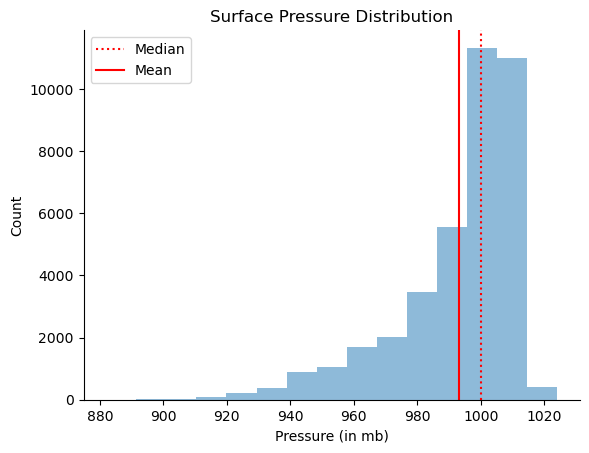

In [297]:
plt.figure()

plt.hist(final_tracks_df['usa_pres'], bins=15, alpha=0.5)
plt.title('Surface Pressure Distribution')
plt.xlabel('Pressure (in mb)')
plt.ylabel('Count')
plt.axvline(final_tracks_df['usa_pres'].median(), linestyle=':', color='red', label='Median')
plt.axvline(final_tracks_df['usa_pres'].mean(), linestyle='-', color='red', label='Mean')

plt.legend()
sns.despine()
plt.plot()

There is a strong left skew to the distribution. This is as expected because in general, lower surface pressures point to stronger, more devastating storms. In such a case, median would be the appropriate measure to fill the NaN values.

We can assign them values based on the `usa_sshs` columns (the category of the storm).

__NOTE:__ The `usa_sshs` column categorizes storms/disturbances by wind speeds (from US agency) based on the Saffir-Simpson Hurricane Scale.
* -5 = Unknown [XX] 
* -4 = Post-tropical [EX, ET, PT]
* -3 = Miscellaneous disturbances [WV, LO, DB, DS, IN, MD]
* -2 = Subtropical [SS, SD]
* -1 = Tropical depression (W<34)
* 0 = Tropical storm [34<W<64]
* 1 = Category 1 [64<=W<83]
* 2 = Category 2 [83<=W<96]
* 3 = Category 3 [96<=W<113]
* 4 = Category 4 [113<=W<137]
* 5 = Category 5 [W >= 137]

In [311]:
final_tracks_df['usa_sshs'].value_counts(normalize=True)

 0    0.344731
-1    0.288518
 1    0.130888
-3    0.079122
 2    0.050007
-2    0.039373
 3    0.031961
 4    0.022987
-5    0.007590
 5    0.004823
Name: usa_sshs, dtype: float64

I will store the medians for `usa-pres` corresponding to the `usa_sshs` code in a dictionary. 

In [312]:
pres_medians = (final_tracks_df.groupby(['usa_sshs']).median()['usa_pres']).to_dict() # store the medians in a dictionary

In [313]:
pres_medians

{-5: nan,
 -3: 1009.0,
 -2: 1002.0,
 -1: 1008.0,
 0: 1000.0,
 1: 982.0,
 2: 968.0,
 3: 955.0,
 4: 941.0,
 5: 920.0}

In [314]:
final_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50593 entries, 0 to 50592
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sid          50593 non-null  object        
 1   season       50593 non-null  int32         
 2   number       50593 non-null  int32         
 3   basin        391 non-null    object        
 4   subbasin     11634 non-null  object        
 5   name         50593 non-null  object        
 6   iso_time     50593 non-null  datetime64[ns]
 7   lat          50593 non-null  float64       
 8   lon          50593 non-null  float64       
 9   dist2land    50593 non-null  int32         
 10  landfall     49902 non-null  float64       
 11  usa_status   50593 non-null  object        
 12  usa_wind     50209 non-null  float64       
 13  usa_pres     38174 non-null  float64       
 14  usa_sshs     50593 non-null  int64         
 15  storm_speed  50593 non-null  int32         
 16  stor

In [315]:
final_tracks_df.shape

(50593, 17)

In [316]:
final_tracks_df.index

RangeIndex(start=0, stop=50593, step=1)

In [323]:
# replace NaN with values from dictionary
for row in (final_tracks_df.index):
    print('Row Number'+str(row), end='\r')
    if np.isnan(final_tracks_df.iloc[row,13]):
        x = final_tracks_df.iloc[row,14]
        final_tracks_df.iloc[row,13] = pres_medians[x]
    else:
        continue
print('\nDone')
        

Row Number50592
Done


Let's check how many 'NaN' values are left in `usa_pres`.

In [324]:
final_tracks_df['usa_pres'].isnull().sum()

384

There are only 384 'NaN' values left in `usa_pres`. These correspond to a `usa_sshs` category of '-5' (unknown). 

In [325]:
final_tracks_df[final_tracks_df['usa_pres'].isnull()]

,sid,season,number,basin,subbasin,name,iso_time,lat,lon,dist2land,landfall,usa_status,usa_wind,usa_pres,usa_sshs,storm_speed,storm_dir
4884,1967162N28297,1967,36,NaN,NaN,NOT_NAMED,1967-06-10 12:00:00,28.0000,-63.0000,1105,1105.0,TD,NaN,NaN,-5,5,5
4885,1967162N28297,1967,36,NaN,NaN,NOT_NAMED,1967-06-10 15:00:00,28.2300,-62.9777,1126,1126.0,TD,NaN,NaN,-5,5,2
4886,1967162N28297,1967,36,NaN,NaN,NOT_NAMED,1967-06-10 18:00:00,28.5000,-63.0000,1159,1159.0,TD,NaN,NaN,-5,6,351
4887,1967162N28297,1967,36,NaN,NaN,NOT_NAMED,1967-06-10 21:00:00,28.8350,-63.0923,1189,1189.0,TD,NaN,NaN,-5,7,346
4888,1967162N28297,1967,36,NaN,NaN,NOT_NAMED,1967-06-11 00:00:00,29.2000,-63.2000,1231,1231.0,TD,NaN,NaN,-5,7,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20792,1987249N13297,1987,71,NaN,NaN,NOT_NAMED,1987-09-08 18:00:00,14.0000,-83.9000,0,NaN,TD,NaN,NaN,-5,18,269
20844,1987250N29282,1987,73,NaN,NaN,NOT_NAMED,1987-09-08 03:00:00,34.1500,-78.4923,0,0.0,TD,NaN,NaN,-5,13,1
20845,1987250N29282,1987,73,NaN,NaN,NOT_NAMED,1987-09-08 06:00:00,34.8000,-78.5000,0,0.0,TD,NaN,NaN,-5,13,0
20846,1987250N29282,1987,73,NaN,NaN,NOT_NAMED,1987-09-08 09:00:00,35.4125,-78.5026,0,0.0,TD,NaN,NaN,-5,12,1


These rows are still categorized by the `usa_status` column. Let's check if all the rows are marked 'TD' (Tropical Depression). If they are we can use the median `usa_pres` value for 'TD' to fill the NaN values. 

In [326]:
# check if all null values in usa_pres have 'TD' usa_status
final_tracks_df[final_tracks_df['usa_pres'].isnull()]['usa_status'].unique()

array(['TD'], dtype=object)

In [327]:
# median pressure value of `usa_pres` for 'TD' category. 
median_pres_td = final_tracks_df[final_tracks_df['usa_status']=='TD']['usa_pres'].median()
median_pres_td

1008.0

In [328]:
# replacing NaNs with median_pres_td
final_tracks_df['usa_pres'].fillna(value=median_pres_td, inplace=True)
final_tracks_df['usa_pres'].isnull().sum()

0

All the 'NaN' values in `usa_pres` successfully filled. 

In [330]:
# sanity check
final_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50593 entries, 0 to 50592
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sid          50593 non-null  object        
 1   season       50593 non-null  int32         
 2   number       50593 non-null  int32         
 3   basin        391 non-null    object        
 4   subbasin     11634 non-null  object        
 5   name         50593 non-null  object        
 6   iso_time     50593 non-null  datetime64[ns]
 7   lat          50593 non-null  float64       
 8   lon          50593 non-null  float64       
 9   dist2land    50593 non-null  int32         
 10  landfall     49902 non-null  float64       
 11  usa_status   50593 non-null  object        
 12  usa_wind     50209 non-null  float64       
 13  usa_pres     50593 non-null  float64       
 14  usa_sshs     50593 non-null  int64         
 15  storm_speed  50593 non-null  int32         
 16  stor

#### `usa_wind`

Let's repeat the same process for `usa_wind` column.

Start with checking for number of 'NaN' values.

In [331]:
final_tracks_df['usa_wind'].isnull().sum()

384

Only 384 'NaN' values. Let's check which `usa_sshs` and `usa_status` category they correspond with.

In [332]:
final_tracks_df[final_tracks_df['usa_wind'].isnull()]['usa_sshs'].unique()

array([-5], dtype=int64)

In [333]:
final_tracks_df[final_tracks_df['usa_wind'].isnull()]['usa_status'].unique()

array(['TD'], dtype=object)

Corresponds to 'TD' (tropical depression) category in `usa_status`. Let's take a look at the distribution of `usa_wind` to see if mean or median would bea better replacement value.

[]

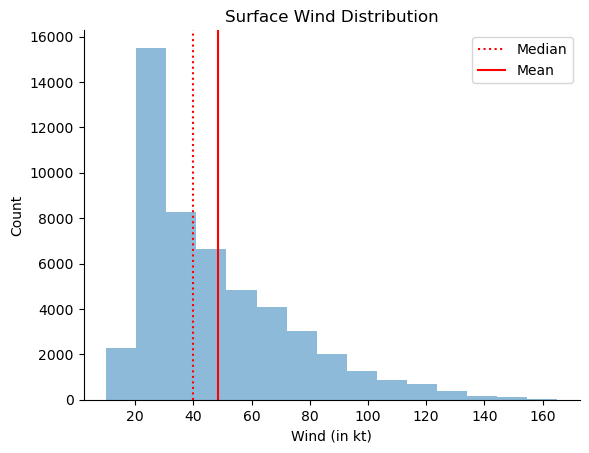

In [334]:
plt.figure()

plt.hist(final_tracks_df['usa_wind'], bins=15, alpha=0.5)
plt.title('Surface Wind Distribution')
plt.xlabel('Wind (in kt)')
plt.ylabel('Count')
plt.axvline(final_tracks_df['usa_wind'].median(), linestyle=':', color='red', label='Median')
plt.axvline(final_tracks_df['usa_wind'].mean(), linestyle='-', color='red', label='Mean')

plt.legend()
sns.despine()
plt.plot()

We see a strong right skew (as expected since high velocity winds are rare and occur only with Tropical Storms and Hurricanes). Let's use median wind speed value for 'TD' category to fill 'NaNs'.

In [335]:
median_wind_td = final_tracks_df[final_tracks_df['usa_status']=='TD']['usa_wind'].median()
median_wind_td

30.0

In [336]:
# fill nans using median
final_tracks_df['usa_wind'].fillna(value=median_wind_td, inplace=True)

In [337]:
final_tracks_df['usa_wind'].isnull().sum()

0

All NaNs in `usa_wind` successfully filled. 

In [339]:
# check percentage of null values in each column
final_tracks_df.isnull().sum()*100 / len(final_tracks_df)

sid             0.000000
season          0.000000
number          0.000000
basin          99.227166
subbasin       77.004724
name            0.000000
iso_time        0.000000
lat             0.000000
lon             0.000000
dist2land       0.000000
landfall        1.365802
usa_status      0.000000
usa_wind        0.000000
usa_pres        0.000000
usa_sshs        0.000000
storm_speed     0.000000
storm_dir       0.000000
dtype: float64

#### Other Columns with NaNs

We can see that the `basin` and `subbasin` columns have majority of values (~99% and ~77%) NaNs. These columns are not useful for further analysis. I will drop these columns.

The `landfall` column is made redundant by the `dist2land` column. Therefore, I will drop this column as well.

In [340]:
final_tracks_df.drop(columns=['basin', 'subbasin', 'landfall'], inplace=True)

In [342]:
# sanity check
final_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50593 entries, 0 to 50592
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sid          50593 non-null  object        
 1   season       50593 non-null  int32         
 2   number       50593 non-null  int32         
 3   name         50593 non-null  object        
 4   iso_time     50593 non-null  datetime64[ns]
 5   lat          50593 non-null  float64       
 6   lon          50593 non-null  float64       
 7   dist2land    50593 non-null  int32         
 8   usa_status   50593 non-null  object        
 9   usa_wind     50593 non-null  float64       
 10  usa_pres     50593 non-null  float64       
 11  usa_sshs     50593 non-null  int64         
 12  storm_speed  50593 non-null  int32         
 13  storm_dir    50593 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(5), int64(1), object(3)
memory usage: 4.4+ MB


In [344]:
# check for null values
final_tracks_df.isnull().sum()

sid            0
season         0
number         0
name           0
iso_time       0
lat            0
lon            0
dist2land      0
usa_status     0
usa_wind       0
usa_pres       0
usa_sshs       0
storm_speed    0
storm_dir      0
dtype: int64

__No more NaNs.__

## Writing Final Dataset to *.csv* file

In [346]:
final_tracks_df.to_csv('data/capstone_track_data.csv')

--------------------------------